<a href="https://colab.research.google.com/github/zaraaa12/Machine_Learning/blob/main/EnsembleLearning_HealthStatus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
#Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [23]:
#Load Data
df = pd.read_csv('test.csv')
df.head()

,index,Nomor peserta,Nomor keluarga,Bobot,ID Kunjungan FKTP,Tanggal Datang,Tanggal Pulang,Provinsi Faskes,Kepemilikan Faskes,Jenis Faskes,...,Tingkat Pelayanan Faskes,Jenis Poli,Segmen Peserta,Diagnosis,Provinsi Faskes Rujukan,Kepemilikan Faskes Rujukan,Jenis Faskes Rujukan,Tipe Faskes Rujukan,Jenis Poli Rujukan,Jenis Kunjungan Faskes
0,0,63610662.0,63610662,255.907318,479191219P000012,2019-12-13,2019-12-13,Jawa Timur,Swasta,Dokter Umum,...,RJTP,POLI UMUM,Bukan pekerja,"Influenza, virus not identified",NaN,Tidak dirujuk,Tidak dirujuk,NaN,TIDAK DIRUJUK,Kunjungan sakit
1,1,52193774.0,86722228,57.358536,375650319P000281,2019-03-16,2019-03-16,Jawa Tengah,Swasta,Dokter Umum,...,RJTP,POLI UMUM,PPU,Acute nasopharyngitis [common cold],NaN,Tidak dirujuk,Tidak dirujuk,NaN,TIDAK DIRUJUK,Kunjungan sakit
2,2,106515655.0,106515655,242.670731,1279887537,2020-07-15,2020-07-15,Lampung,PemKab,Puskesmas,...,RJTP,KUNJUNGAN ONLINE,PBI APBN,9999,NaN,Tidak dirujuk,Tidak dirujuk,NaN,TIDAK DIRUJUK,Kunjungan sehat
3,3,35045772.0,35045772,39.499653,196840820P000138,2020-08-11,2020-08-11,Sumatera Selatan,Swasta,Dokter Umum,...,RJTP,POLI UMUM,PPU,Allergic contact dermatitis,NaN,Tidak dirujuk,Tidak dirujuk,NaN,TIDAK DIRUJUK,Kunjungan sakit
4,4,10039586.0,10039586,116.082756,739387277,2019-01-09,2019-01-09,Sulawesi Selatan,PemKab,Puskesmas,...,RJTP,Home-Visit,PBI APBN,9999,NaN,Tidak dirujuk,Tidak dirujuk,NaN,TIDAK DIRUJUK,Kunjungan sehat


In [24]:
#Identifikasi data
df.info() #Memeriksa Tipe Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   index                       200000 non-null  int64  
 1   Nomor peserta               200000 non-null  float64
 2   Nomor keluarga              200000 non-null  int64  
 3   Bobot                       200000 non-null  float64
 4   ID Kunjungan FKTP           200000 non-null  object 
 5   Tanggal Datang              200000 non-null  object 
 6   Tanggal Pulang              200000 non-null  object 
 7   Provinsi Faskes             200000 non-null  object 
 8   Kepemilikan Faskes          200000 non-null  object 
 9   Jenis Faskes                200000 non-null  object 
 10  Tipe Faskes                 200000 non-null  object 
 11  Tingkat Pelayanan Faskes    200000 non-null  object 
 12  Jenis Poli                  200000 non-null  object 
 13  Segmen Peserta

In [25]:
# Menghitung persentase duplikasi
percentage_duplicates = (df.duplicated().sum() / df.shape[0]) * 100

print("Jumlah duplikasi : ", df.duplicated().sum()) #Melihat Jumlah Duplikasi Data
print(f"Persentase duplikasi: {percentage_duplicates:.2f}%")

Jumlah duplikasi :  0
Persentase duplikasi: 0.00%


In [26]:
df.describe() #Memeriksa Parameter Statistik

,index,Nomor peserta,Nomor keluarga,Bobot
count,200000.000000,2.000000e+05,2.000000e+05,200000.000000
mean,99999.500000,8.885809e+07,9.219263e+07,116.741321
std,57735.171256,8.643869e+07,8.509688e+07,213.983383
min,0.000000,3.700000e+02,1.010000e+02,0.765033
25%,49999.750000,3.329344e+07,3.529202e+07,19.329617
50%,99999.500000,6.714019e+07,7.137556e+07,59.249477
75%,149999.250000,1.007290e+08,1.075190e+08,142.240768
max,199999.000000,4.553693e+08,4.553795e+08,23564.787109


In [27]:
#cleaning data
df.drop_duplicates(inplace=True) #Menghapus Data Duplikat

In [28]:
print("Jumlah Duplikasi : ", df.duplicated().sum()) #Melihat Jumlah Duplikasi Data

Jumlah Duplikasi :  0


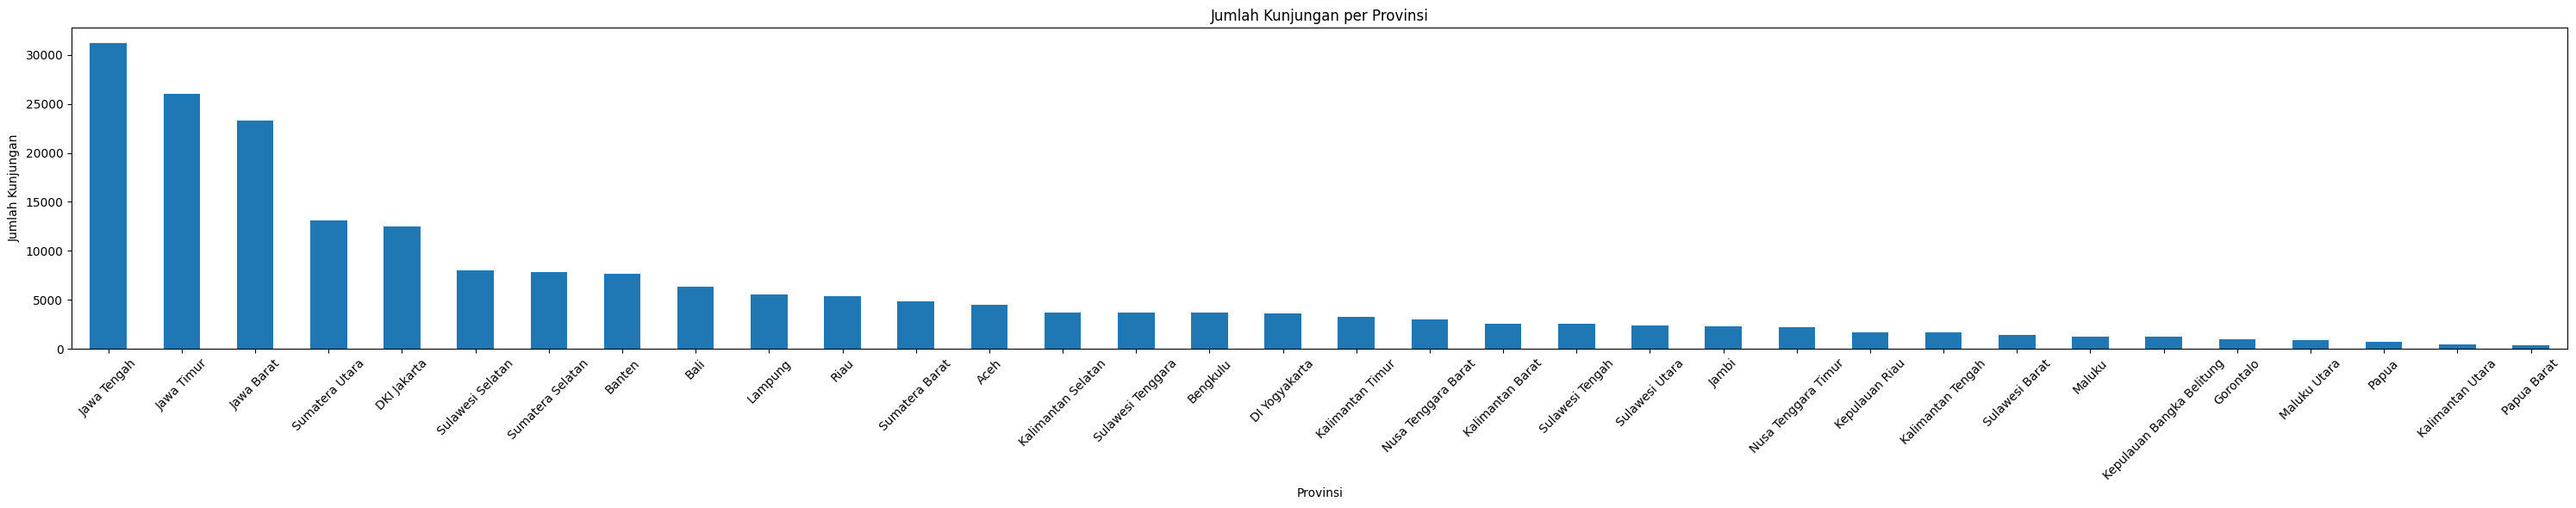

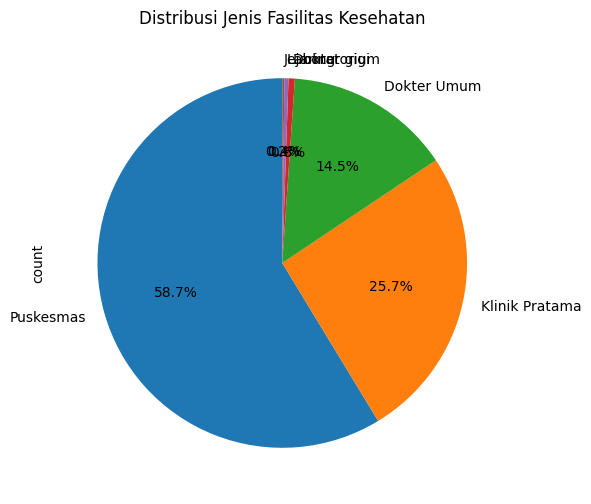

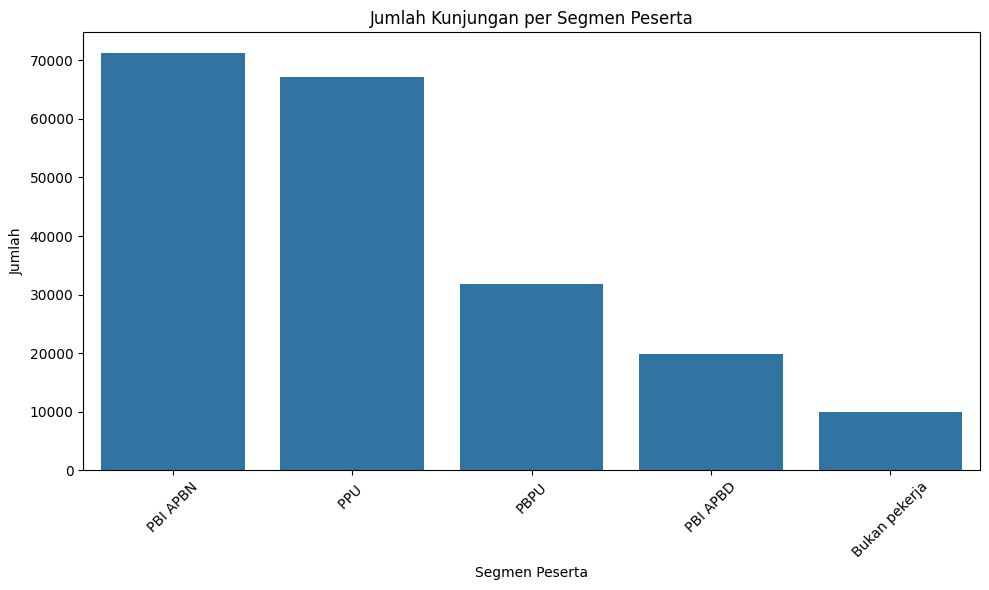

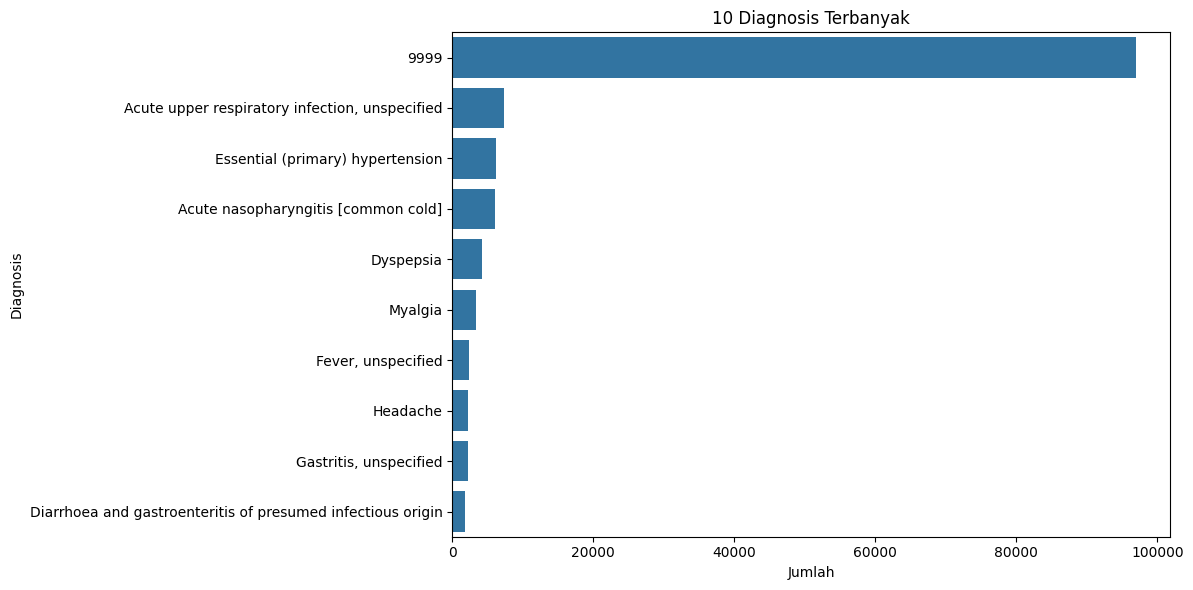

In [29]:
#Provinsi mana yang paling banyak dikunjungi
plt.figure(figsize=(30,6))
df['Provinsi Faskes'].value_counts().plot(kind='bar')
plt.title("Jumlah Kunjungan per Provinsi")
plt.ylabel("Jumlah Kunjungan")
plt.xlabel("Provinsi")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Jenis Faskes terbanyak digunakan
plt.figure(figsize=(50,6))
df['Jenis Faskes'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Distribusi Jenis Fasilitas Kesehatan")
plt.show()

#Jumlah kunjungan per Segmen Peserta
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Segmen Peserta", order=df["Segmen Peserta"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Jumlah Kunjungan per Segmen Peserta")
plt.xlabel("Segmen Peserta")
plt.ylabel("Jumlah")
plt.tight_layout()
plt.show()

# Distribusi Diagnosis
plt.figure(figsize=(12,6))
sns.countplot(data=df, y="Diagnosis", order=df["Diagnosis"].value_counts().head(10).index)
plt.title("10 Diagnosis Terbanyak")
plt.xlabel("Jumlah")
plt.ylabel("Diagnosis")
plt.tight_layout()
plt.show()


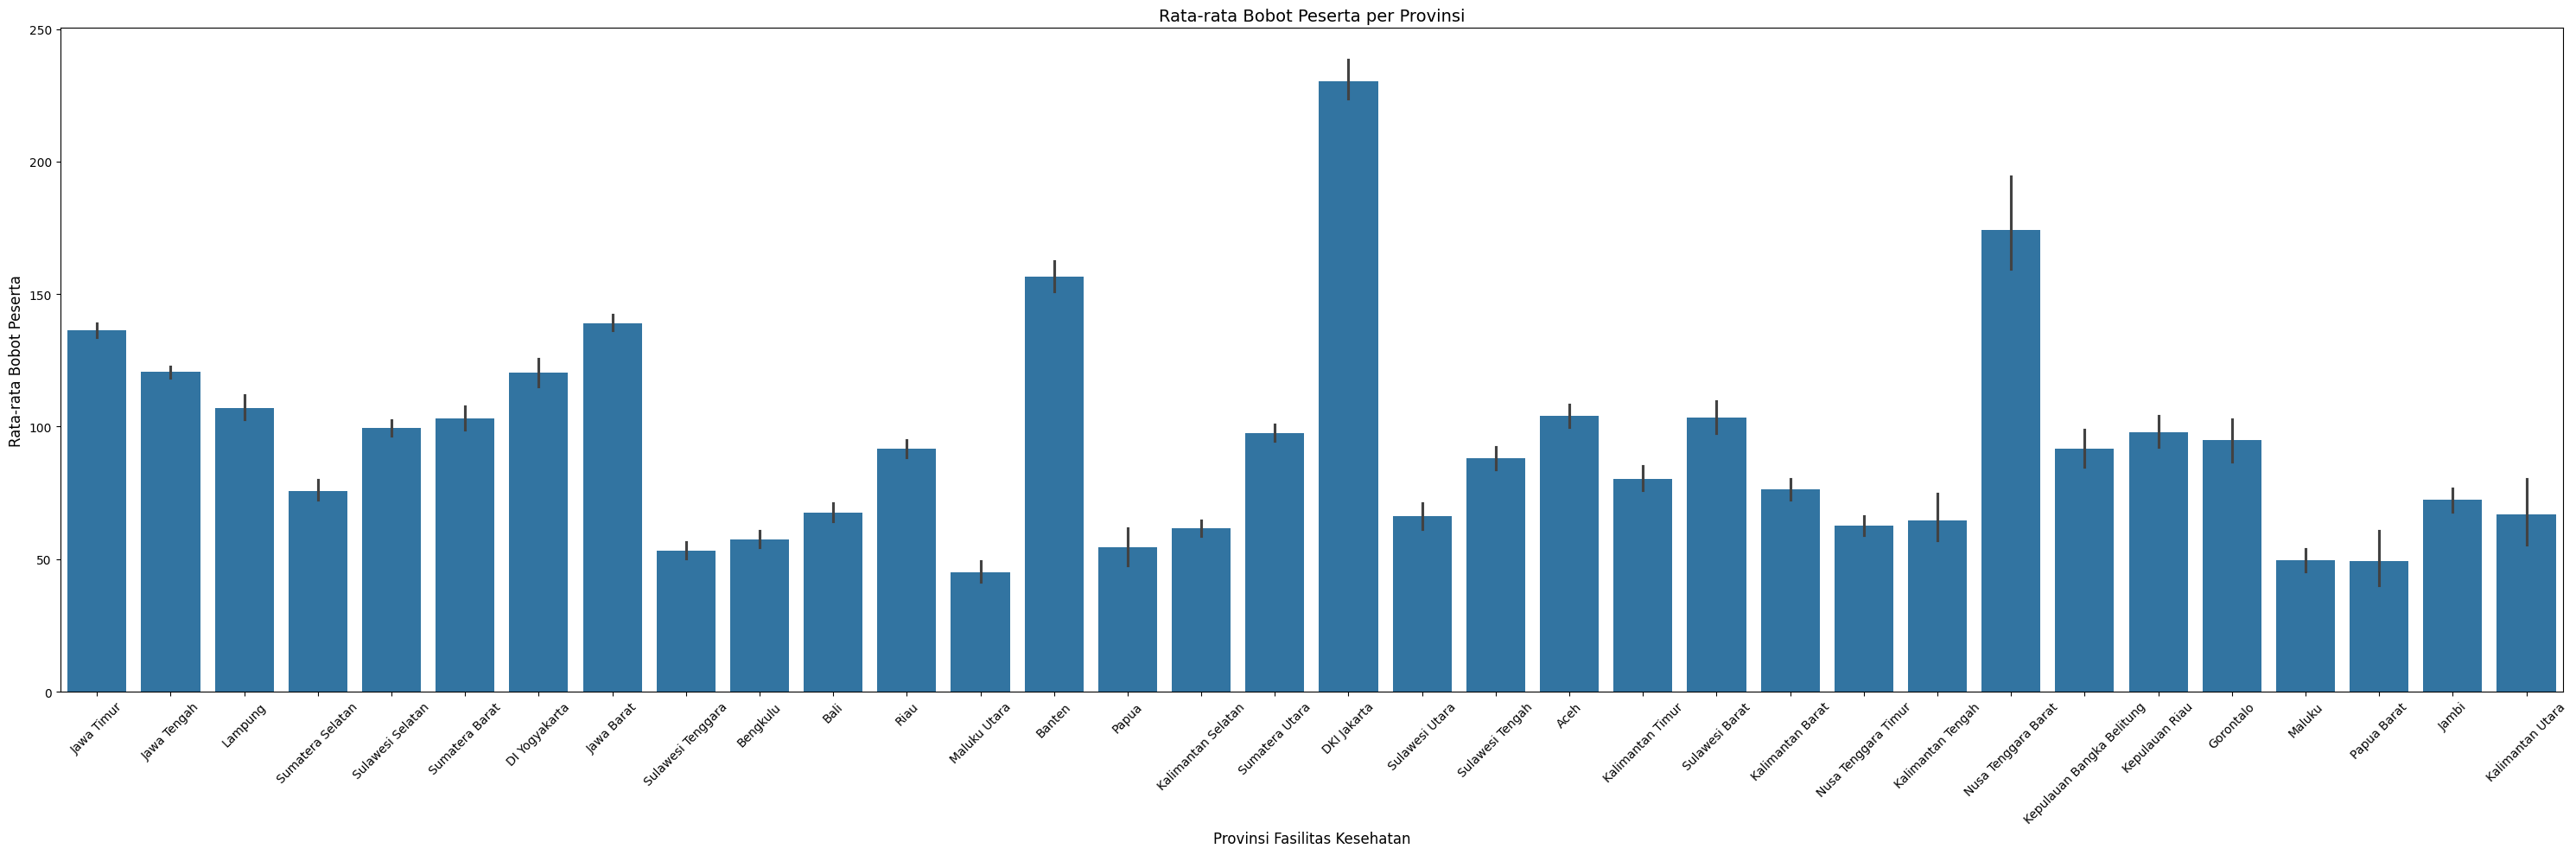

In [30]:
plt.figure(figsize=(30, 10))
sns.barplot(x='Provinsi Faskes', y='Bobot', data=df, estimator=np.mean)
plt.xlabel('Provinsi Fasilitas Kesehatan', fontsize=12)
plt.ylabel('Rata-rata Bobot Peserta', fontsize=12)
plt.title('Rata-rata Bobot Peserta per Provinsi', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [32]:
#Feature Engineering
df["Kepemilikan Faskes"].replace({"Swasta" : 1,
                                  "PemKab" : 2,
                                  "PemProv": 3,
                                  "Kementrian" : 4}, inplace=True)

df["Jenis Faskes"].replace({"Dokter Umum" : 1,
                            "Puskesmas" : 2,
                            "Klinik" : 3,
                            "RSUD" : 4}, inplace=True)

df["Tipe Faskes"].replace({"Dokter Praktek Perorangan" : 1,
                           "Rawat Inap" : 2,
                           "Rawat Jalan" : 3,
                           "UGD" : 4}, inplace=True)

df["Tingkat Pelayanan Faskes"].replace({"RJTP" : 1,
                                        "RJTL" : 2,
                                        "RITP" : 3,
                                        "RITL" : 4}, inplace=True)

df["Jenis Poli"].replace({"POLI UMUM" : 1,
                          "Home-VISIT" : 2,
                          "KUNJUNGAN ONLINE" : 3,
                          "POLI GIGI" : 4}, inplace=True)
# otomatis encode ke angka unik per provinsi
df["Provinsi Faskes"] = df["Provinsi Faskes"].astype('category').cat.codes

df["Segmen Peserta"].replace({"Bukan Pekerja" : 1,
                              "PPU" : 2,
                              "PBI APBN" : 3,
                              "PBI APBD" : 4,
                              "Mandiri" : 5}, inplace=True)
#Diagnosis label encoding otomatis
df["Diagnosis"]=df["Diagnosis"].astype("category").cat.codes

df["Kepemilikan Faskes Rujukan"].replace({"Tidak dirujuk" : 0,
                                          "Swasta" : 1,
                                          "PemKab" : 2,
                                          "PemProv" : 3}, inplace=True)

df["Jenis Faskes Rujukan"].replace({"Tidak dirujuk": 0,
                                    "Puskesmas": 1,
                                    "Klinik": 2,
                                    "RSUD": 3,
                                    "Dokter Umum": 4}, inplace=True)

df["Jenis Poli Rujukan"].replace({"TIDAK DIRUJUK": 0,
                                  "POLI UMUM": 1,
                                  "POLI GIGI": 2,
                                  "Home-Visit": 3}, inplace=True)

# Optional: drop kolom kosong jika tidak informatif
df.drop(columns=["Tipe Faskes Rujukan", "Provinsi Faskes Rujukan"], inplace=True)
df.head()

<ipython-input-32-f7455433c134>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Kepemilikan Faskes"].replace({"Swasta" : 1,
<ipython-input-32-f7455433c134>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

,index,Nomor peserta,Nomor keluarga,Bobot,ID Kunjungan FKTP,Tanggal Datang,Tanggal Pulang,Provinsi Faskes,Kepemilikan Faskes,Jenis Faskes,Tipe Faskes,Tingkat Pelayanan Faskes,Jenis Poli,Segmen Peserta,Diagnosis,Kepemilikan Faskes Rujukan,Jenis Faskes Rujukan,Jenis Poli Rujukan,Jenis Kunjungan Faskes
0,0,63610662.0,63610662,255.907318,479191219P000012,2019-12-13,2019-12-13,10,Swasta,1,Dokter Prakter Perorangan,1,1,Bukan pekerja,1513,0,0,0,Kunjungan sakit
1,1,52193774.0,86722228,57.358536,375650319P000281,2019-03-16,2019-03-16,9,Swasta,1,Dokter Prakter Perorangan,1,1,PPU,123,0,0,0,Kunjungan sakit
2,2,106515655.0,106515655,242.670731,1279887537,2020-07-15,2020-07-15,18,2,2,2,1,3,3,0,0,0,0,Kunjungan sehat
3,3,35045772.0,35045772,39.499653,196840820P000138,2020-08-11,2020-08-11,32,Swasta,1,Dokter Prakter Perorangan,1,1,PPU,186,0,0,0,Kunjungan sakit
4,4,10039586.0,10039586,116.082756,739387277,2019-01-09,2019-01-09,27,2,2,2,1,Home-Visit,3,0,0,0,0,Kunjungan sehat


In [42]:
# Drop data dengan target NaN
df = df.dropna(subset=["Jenis Poli Rujukan"])

# Encode fitur kategorikal
categorical_cols = ["Segmen Peserta", "Diagnosis", "Jenis Poli", "Jenis Poli Rujukan"]
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Definisikan fitur dan target
X = df[["Segmen Peserta", "Diagnosis", "Bobot", "Jenis Poli"]]
Y = df["Jenis Poli Rujukan"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=3)

# Model training
rf = RandomForestClassifier()
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)

rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

models = [rf, gb]
Model = ['RandomForestClassifier', 'XgBoost']

# Evaluasi akurasi
train_accuracy = []
test_accuracy = []

for model in models:
    yhat_test = model.predict(X_test)
    yhat_train = model.predict(X_train)
    train_accuracy.append(accuracy_score(y_train, yhat_train))
    test_accuracy.append(accuracy_score(y_test, yhat_test))

# Tampilkan skor akurasi
Accuracy_score = pd.DataFrame({
    'Model': Model,
    'Train_Accuracy': train_accuracy,
    'Test_Accuracy': test_accuracy
})

Accuracy_score


,Model,Train_Accuracy,Test_Accuracy
0,RandomForestClassifier,0.998207,0.93658
1,XgBoost,0.930573,0.93006


In [43]:
score=dict(zip(Model, Accuracy_score['Test_Accuracy'].values)) #Membuat Dictionary Dari Hasil Akurasi
score={k: v for k, v in sorted(score.items(), key=lambda item: item[1])} #Mengurutkan Dictionary Berdasarkan Nilai Akurasi

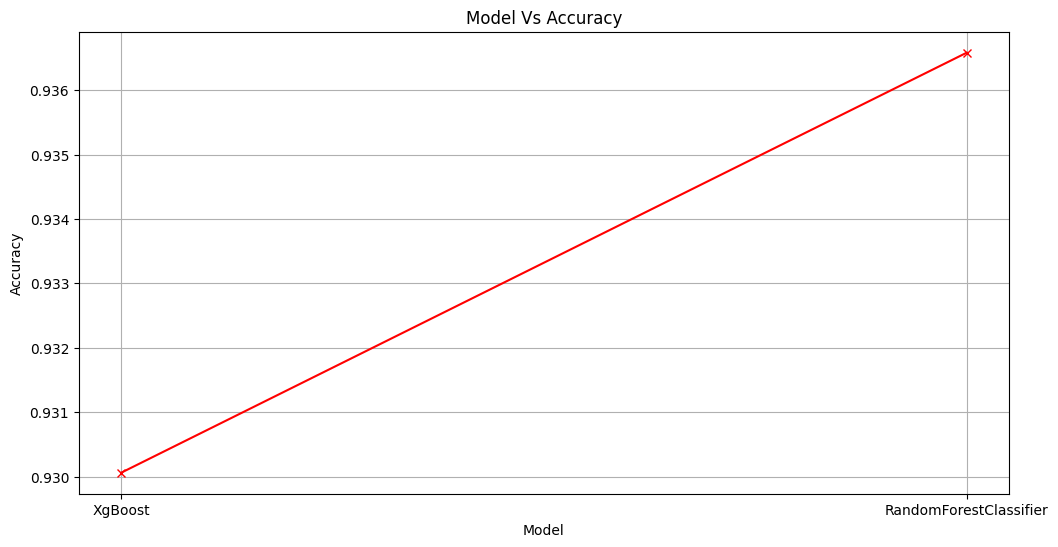

In [44]:
#Membuat Grafik Perbandingan Model dan Akurasi
plt.figure(figsize=(12,6))
plt.plot(list(score.keys()),list(score.values()),marker='x',color='red')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Vs Accuracy')
plt.grid()

In [45]:
#Model Terbaik
best_model = Accuracy_score.loc[Accuracy_score['Test_Accuracy'].idxmax()]
print("Model terbaik berdasarkan akurasi pada data uji:")
print(best_model)

Model terbaik berdasarkan akurasi pada data uji:
Model             RandomForestClassifier
Train_Accuracy                  0.998207
Test_Accuracy                    0.93658
Name: 0, dtype: object


In [46]:
# Ambil model dengan akurasi tertinggi dari Accuracy_score
best_model_name = Accuracy_score.loc[Accuracy_score['Test_Accuracy'].idxmax()]['Model']
best_model_index = Model.index(best_model_name)
best_model = models[best_model_index]

# Lakukan prediksi pada data uji
y_pred = best_model.predict(X_test)

#Model Evaluation
print(accuracy_score(y_test,y_pred))

0.93658


In [47]:
# Prediksi pada data baru (contoh: data test)
# Misalnya, kita akan menggunakan satu baris dari data uji sebagai contoh
sample_data = X_test.iloc[0].values.reshape(1, -1)
prediction = gb.predict(sample_data)
print("Prediction:", prediction)

Prediction: [0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [48]:
# Evaluasi model dengan mencetak laporan klasifikasi
print("Laporan Klasifikasi untuk Model Terbaik:")
print(classification_report(y_test, y_pred))

Laporan Klasifikasi untuk Model Terbaik:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     46390
           1       0.58      0.43      0.50      3610

    accuracy                           0.94     50000
   macro avg       0.77      0.70      0.73     50000
weighted avg       0.93      0.94      0.93     50000



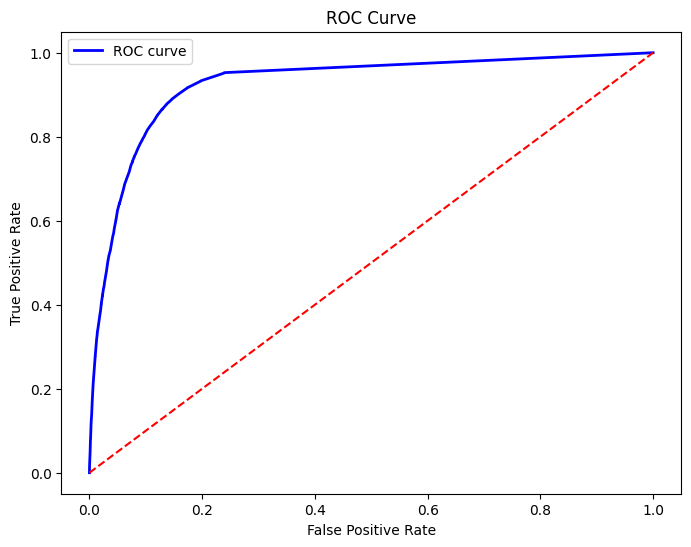

Area under the ROC curve (AUC): 0.93


In [49]:
# Mendapatkan nilai keputusan dari model terbaik
y_scores = best_model.predict_proba(X_test)[:, 1]

# Menghitung false positive rate, true positive rate, dan threshold
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Hitung Area di Bawah Kurva ROC (AUC)
auc = roc_auc_score(y_test, y_scores)
print(f"Area under the ROC curve (AUC): {auc:.2f}")

Kesimpulan:
Random Forest adalah model dengan akurasi terbaik yaitu 81,57%
area dibawah kurva ROC yaitu 91%